### (Optinal) Finish the k-person-salesman problem:

In [30]:
import time
import sys
import random
import matplotlib.pylab as plt

#### <1> Randomly generate *k* points

In [31]:
random.seed(1)
latitude = [random.randint(-100, 100) for _ in range(20)]
longtitude = [random.randint(-100, 100) for _ in range(20)]
points = list(zip(latitude, longtitude))
print(points)


[(-66, 96), (45, -100), (95, 78), (-84, 14), (-35, -32), (-70, 84), (26, -42), (94, 51), (15, -74), (20, -19), (66, -93), (-3, -95), (-47, -94), (-76, 66), (24, 38), (-93, -98), (-1, -3), (10, 75), (55, -45), (95, 8)]


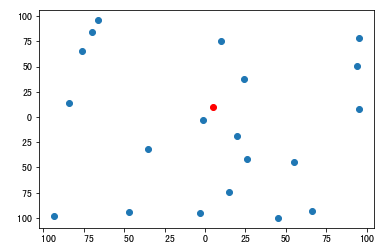

In [32]:
P = (5, 10)
plt.scatter(latitude, longtitude)
plt.scatter([P[0]], [P[1]], color='r')


#### <2> Traversal algorithms in DFS manner
By default, I am going to use euclidean metric as a measure of distance between any pair of points and the metric, as a measure,
follows the triangle inequality theorem. Thus:

$$AB + BC >= AC,\quad\forall A, B, C \in V$$

which implies target route should be a sequence of points without duplicates.

The time complexity of my program is estimated to be $O(2^N)$ with a memoization saving the optimal combination of points.
Applied bit manipulation as key to find value from memoization.

In [34]:
class Solution:
    def shortestRoute(self, points, P):
        """
        :param points: List(tuple), coordinates
        :param P: source point
        :return: List(tuple), optimized route
        """
        # build graph
        # memoization: 
        self.memo = [{} for i in range(len(points)+1)]
        points = [P] + points
        return self.dfs(points, 1, 0)[0][::-1]

    def dfs(self, points, state, currpoint):
        """
        :param points: List(Tuple), list of coordinates
        :param state: int, current state, bits representing previous `points` in the route
        :param currpoint: tuple, current `point`
        :return: Tuple(List, int), a tuple storing `route` and `distance` to the end.
        """
        if state + 1 == (1 << len(points)):
            return ([currpoint], 0)

        if state in self.memo[currpoint]:
            return self.memo[currpoint][state]

        minimum = sys.maxsize
        for i in range(len(points)):
            if state & (1 << i) > 0:
                continue
            route, distance = self.dfs(points, state + (1 << i), i)
            tmp_distance = distance + self.distance(points[currpoint], points[i])
            if tmp_distance < minimum:
                minimum = tmp_distance
                self.memo[currpoint][state] = (route + [currpoint], tmp_distance)
        return self.memo[currpoint][state]
    
    def distance(self, p1, p2):
        """
        return the euclidean distance between two points, p1 and p2.
        """
        return sum(map(lambda x: (x[0] - x[1]) ** 2, zip(p1, p2))) ** (1/2)


In [35]:
# Test
# k points
k = 15
st = time.clock()
ans = Solution()
res = ans.shortestRoute(points[:k], P)
print(res)
print("Time:", time.clock() - st)
print([points[i] for i in res])

[0, 10, 7, 11, 2, 9, 12, 13, 5, 4, 14, 6, 1, 15, 8, 3]
Time: 4.374034999999999
[(-66, 96), (66, -93), (94, 51), (-3, -95), (95, 78), (20, -19), (-47, -94), (-76, 66), (-70, 84), (-35, -32), (24, 38), (26, -42), (45, -100), (-93, -98), (15, -74), (-84, 14)]


#### <3> Plot the routes.


[(5, 10), (-66, 96), (66, -93), (94, 51), (-3, -95), (95, 78), (20, -19), (-47, -94), (-76, 66), (-70, 84), (-35, -32), (24, 38), (26, -42), (45, -100), (-93, -98), (15, -74), (-84, 14)]


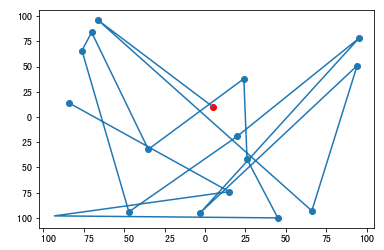

In [36]:
order = [P] + [points[i] for i in res]
P = (5, 10)

plt.scatter(latitude[:k], longtitude[:k])
plt.scatter([P[0]], [P[1]], color='r')
print(order)
plt.plot(*zip(*order))